#**Galaxy Classification Model**

Astronomy in this contemporary era has evolved massively in parallel with advances in computing over the years. Sophisticated computational techniques such as machine learning models are much more efficient now due to the dramatically increased efficiency in computer performance and huge data available to us today. 

Long Centuries ago, the galaxy classification was done by hand with a massive group of experienced people, who used to evaluate the results by using 
cross-validation algorithm. With this inspiration here I will introduce you to a Galaxy Classification Model with Machine Learning.

#**Exploring The Data**

Now, let’s start this task of creating a Galaxy Classification Model by importing all the necessary packages:

Now, as you can see, I have imported all the packages, now let’s start reading the data and exploring it to have a quick look at what we are going to work with:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

zoo = pd.read_csv('/content/GalaxyZoo1_DR_table2.csv')
zoo.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


The first column is a unique identifier which cannot be a feature for our model, and the second and third columns are the absolute positions of galaxies which do not correlate with our classes/targets, so we can remove them all:

In [4]:
data = zoo.drop(['OBJID','RA','DEC'],axis=1)

As this is a Galaxy classification model, so we have to check the class imbalance, in a dataset where we perform classification task even though its class binary imbalance may have a major effect in the phase training, and ultimately on precision. To plot the value_counts for three-class columns, we can do it like the code below:

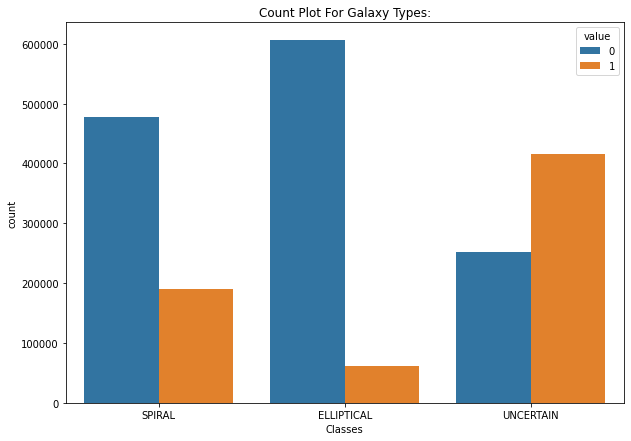

In [5]:
plt.figure(figsize=(10,7))
plt.title('Count Plot For Galaxy Types:')
countplt = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplt))
plt.xlabel('Classes')
plt.show()

#**Splitting The Data**

For any machine learning model that learns from data, this is a conventional method of dividing the original data into training sets and test sets, where the allocation percentages are 80% d training set and 20% test set. and the data set at least should have 1000 data points to avoid overfitting and to simply increase the training period of any model. So now let’s split the data into training and test sets:

In [6]:
X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis = 1).values
Y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 101)

# **Normalising** **the** **data**

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#**Building Neural Networks for Galaxy Classification Model**

Sequential, in Keras, allows us to build the Multilayered Perceptron model from scratch. We can add each layer with a unit number as a parameter of the Dense function where each unit number implies that many densely connected neurons. Now let’s build neural networks using TensorFlow and Keras:

In [11]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import time

model = Sequential()

model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
start = time.perf_counter()

Now let’s fit the data into our neural network. It will take some time to run as the data is itself very large and neural network models take time to run:



In [12]:
model.fit(x = X_train, y= Y_train, epochs = 20)
print('\n TIME ELAPSED {}Seconds'.format(time.perf_counter() - start))

Epoch 1/20
16699/16699 [==============================] - 30s 2ms/step - loss: 0.2860 - accuracy: 0.8755
Epoch 2/20
16699/16699 [==============================] - 30s 2ms/step - loss: 0.2515 - accuracy: 0.8911
Epoch 3/20
16699/16699 [==============================] - 30s 2ms/step - loss: 0.2480 - accuracy: 0.8941
Epoch 4/20
16699/16699 [==============================] - 32s 2ms/step - loss: 0.2451 - accuracy: 0.8957
Epoch 5/20
16699/16699 [==============================] - 31s 2ms/step - loss: 0.2427 - accuracy: 0.8969
Epoch 6/20
16699/16699 [==============================] - 34s 2ms/step - loss: 0.2415 - accuracy: 0.8969
Epoch 7/20
16699/16699 [==============================] - 37s 2ms/step - loss: 0.2396 - accuracy: 0.8975
Epoch 8/20
16699/16699 [==============================] - 38s 2ms/step - loss: 0.2368 - accuracy: 0.8985
Epoch 9/20
16699/16699 [==============================] - 37s 2ms/step - loss: 0.2330 - accuracy: 0.8990
Epoch 10/20
16699/16699 [==============================

Now let’s plot the accuracy to have a look at the accuracy of the neural networks at each epoch:

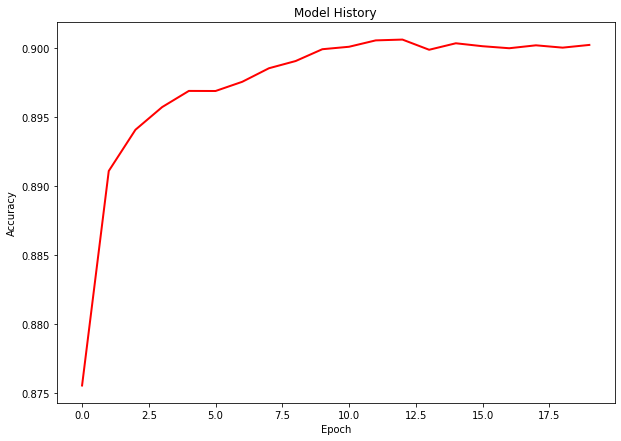

In [13]:
mod_history = pd.DataFrame(model.history.history)
plt.figure(figsize = (10,7))
plt.title('Model History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(mod_history['accuracy'], color = 'red', lw = 2)